In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv(r'../dataset/heart_problem.csv')
df.head()

,Age,Gender,BMI,Smoker,Exercise_Frequency,Blood_Pressure,Cholesterol,Heart_Disease_Risk
0,63,Female,22.15,Yes,High,139.7,262.6,1
1,20,Female,25.01,Yes,High,128.5,219.9,0
2,46,Female,15.47,No,Low,112.0,288.2,0
3,52,Female,31.03,Yes,Low,146.8,153.4,1
4,56,Male,28.40,No,Low,105.6,161.8,0


In [53]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [54]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoker'] = le.fit_transform(df['Smoker'])

In [55]:
oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['Exercise_Frequency'] = oe.fit_transform(df[['Exercise_Frequency']])

In [56]:
df.head()

,Age,Gender,BMI,Smoker,Exercise_Frequency,Blood_Pressure,Cholesterol,Heart_Disease_Risk
0,63,0,22.15,1,2.0,139.7,262.6,1
1,20,0,25.01,1,2.0,128.5,219.9,0
2,46,0,15.47,0,0.0,112.0,288.2,0
3,52,0,31.03,1,0.0,146.8,153.4,1
4,56,1,28.40,0,0.0,105.6,161.8,0


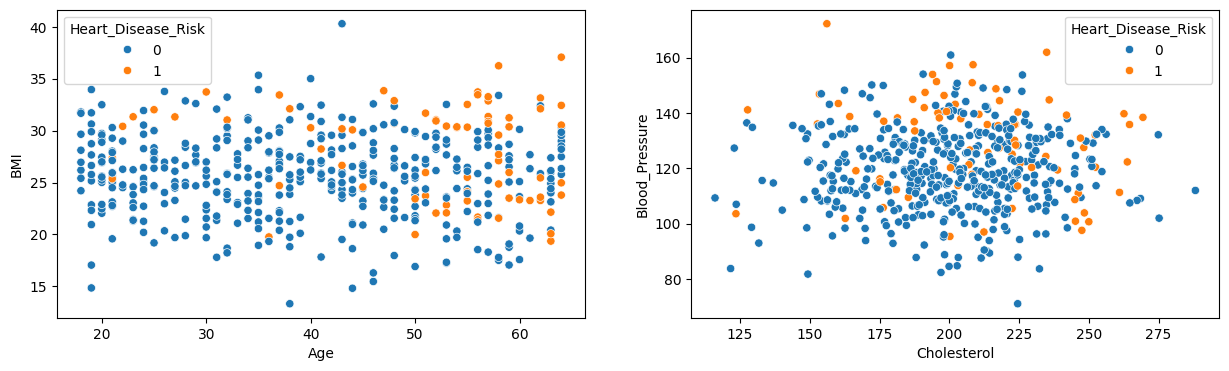

In [57]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='BMI', data=df, hue='Heart_Disease_Risk')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Cholesterol', y='Blood_Pressure', data=df, hue='Heart_Disease_Risk')

plt.show()

In [58]:
x = df.iloc[:, :-1]
y = df['Heart_Disease_Risk']

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
pf = PolynomialFeatures(degree=3)
pf.fit(x)
x = pd.DataFrame(pf.transform(x))

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [65]:
lr.score(x_test, y_test)*100

84.8

In [66]:
test = pf.transform([[63, 0, 22.15,	1, 2.0, 139.7, 262.6]])
lr.predict(test)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([0])